Name: Gabriel Larot   
Email: gabriel.larot@sjsu.edu   
ID: 016876301   

Programming Assignment #2

1. Import the libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

2. Load the Dataset

In [139]:
data = datasets.load_iris()

In [140]:
attributeData = data['data']
labelData = data['target']

print(attributeData)
print(attributeData.shape)
print(labelData)
print(labelData.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

3. Data Exploration

In [141]:
train_df = pd.DataFrame(
    data=attributeData, 
    columns=['Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm', 'Petal_Width_cm']
)
train_df

,Sepal_Length_cm,Sepal_Width_cm,Petal_Length_cm,Petal_Width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


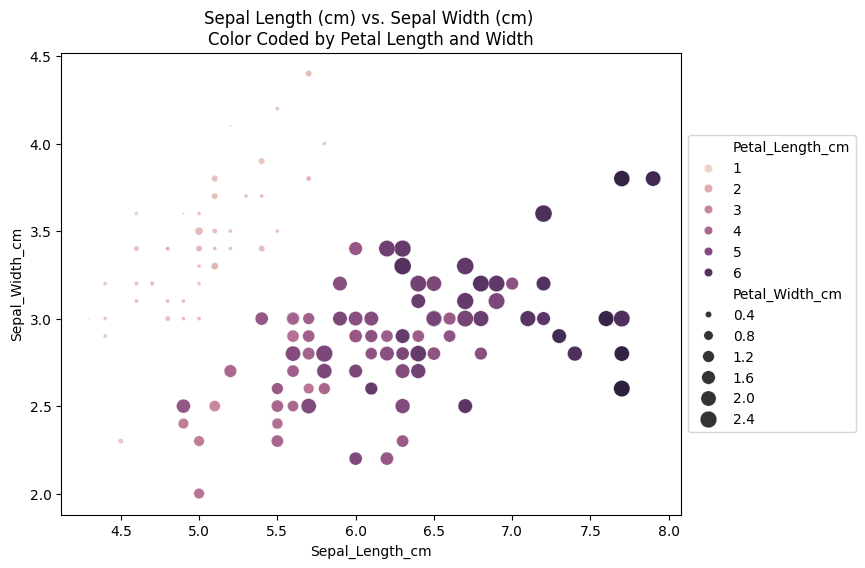

In [142]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=train_df,
    x='Sepal_Length_cm',
    y='Sepal_Width_cm',
    hue='Petal_Length_cm',
    size='Petal_Width_cm',
    sizes=(2,150)
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('Sepal Length (cm) vs. Sepal Width (cm) \nColor Coded by Petal Length and Width');

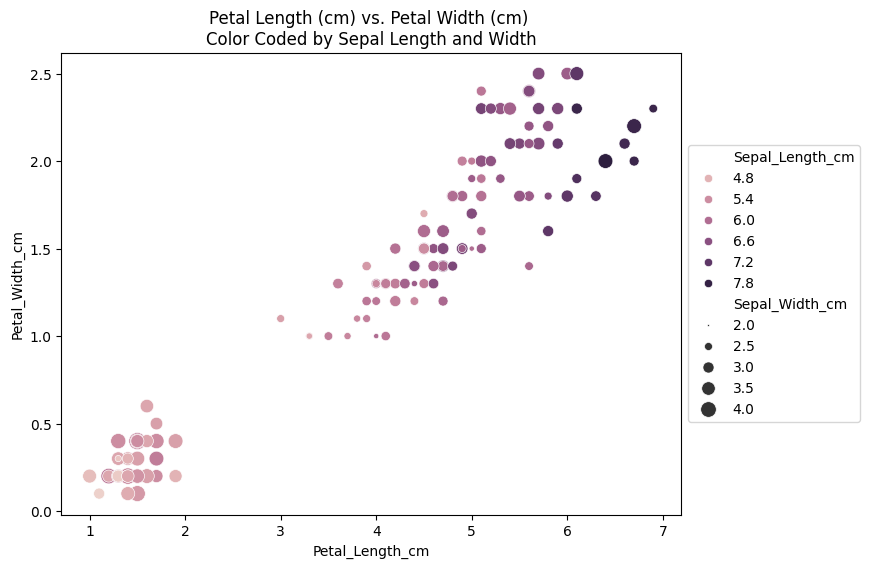

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=train_df,
    x='Petal_Length_cm',
    y='Petal_Width_cm',
    hue='Sepal_Length_cm',
    size='Sepal_Width_cm',
    sizes=(2,150)
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('Petal Length (cm) vs. Petal Width (cm) \nColor Coded by Sepal Length and Width');

Distribution of attributes before preprocessing

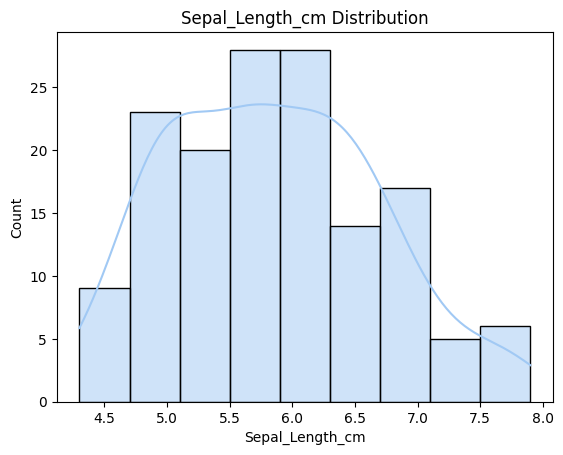

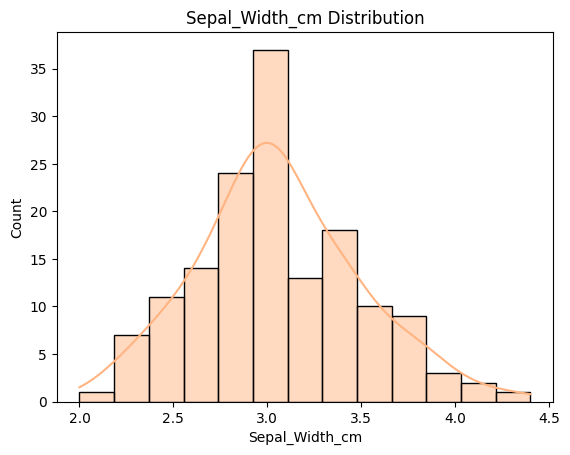

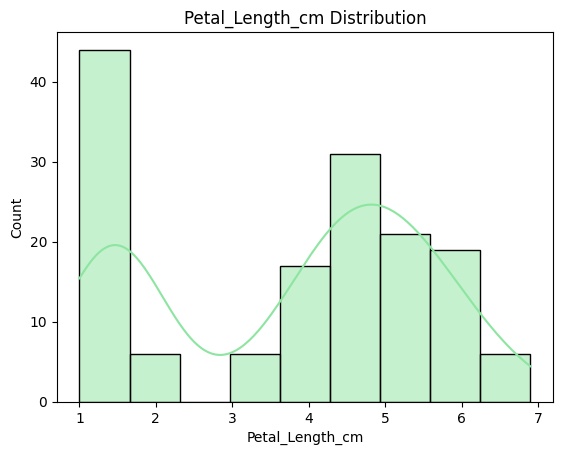

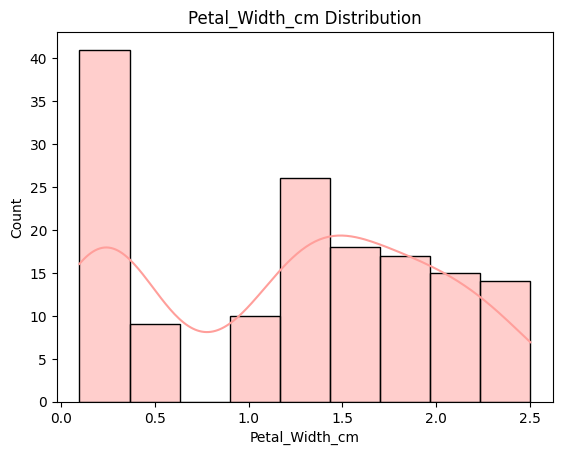

In [144]:
use_train_df = train_df.copy()
attributes = use_train_df.columns.tolist()

for i, attr in enumerate(attributes):
    plt.figure()
    sns.histplot(
        data=train_df,
        x=attr,
        kde=True,
        color=sns.color_palette('pastel')[i]
    )
    plt.title(f'{attr} Distribution')
    plt.xlabel(attr);

Distribution of attributes after preprocessing (using StandardScaler)

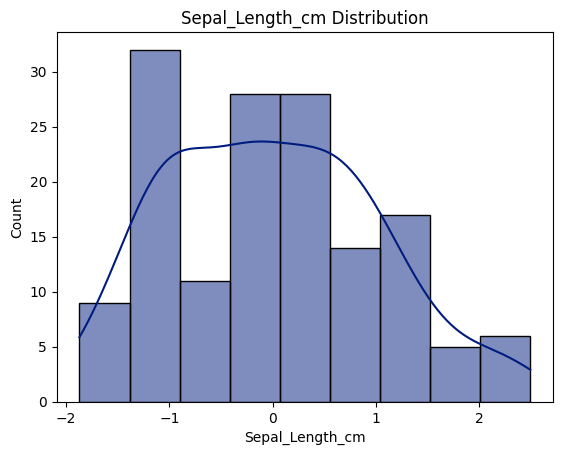

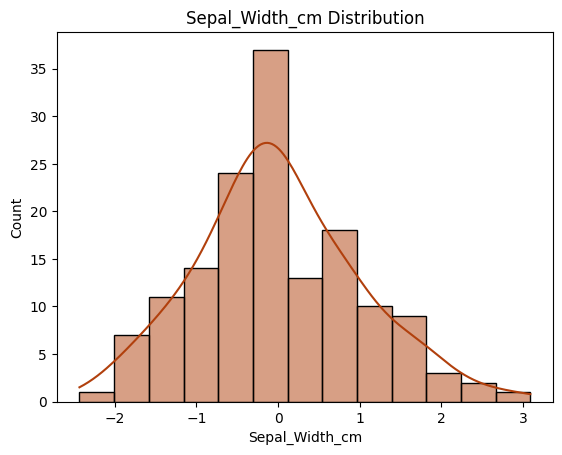

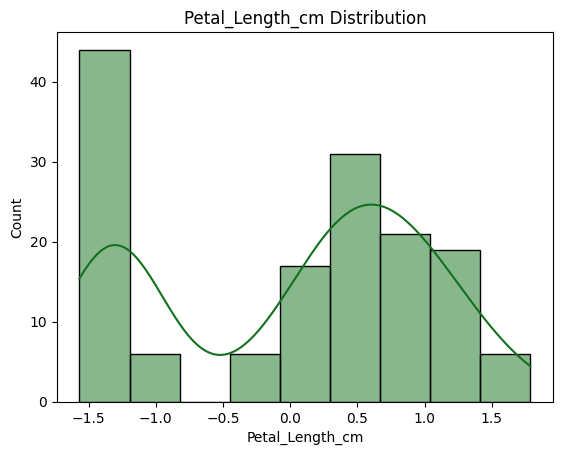

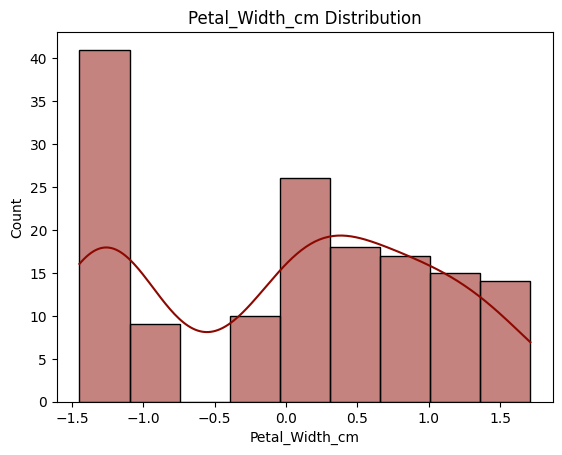

In [145]:
from sklearn.preprocessing import StandardScaler

scaler_train_df = train_df.copy()

train_scaled = StandardScaler().fit_transform(scaler_train_df)
train_scaled_df = pd.DataFrame(train_scaled, columns=scaler_train_df.columns)

for i, attr in enumerate(train_scaled_df.columns):
    plt.figure()
    sns.histplot(
        data=train_scaled_df,
        x=attr,
        kde=True,
        color=sns.color_palette('dark', len(train_scaled_df.columns))[i]
    )
    plt.title(f'{attr} Distribution')
    plt.xlabel(attr)

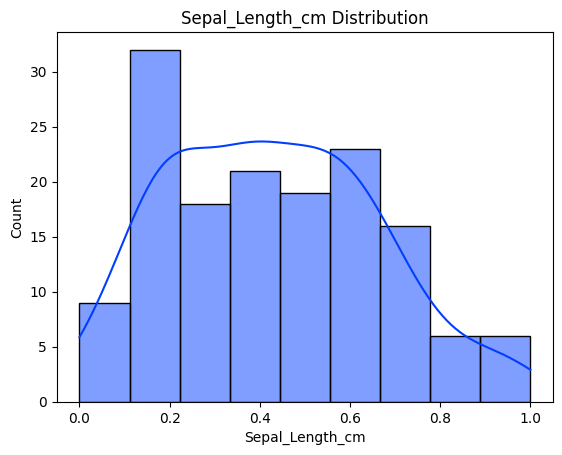

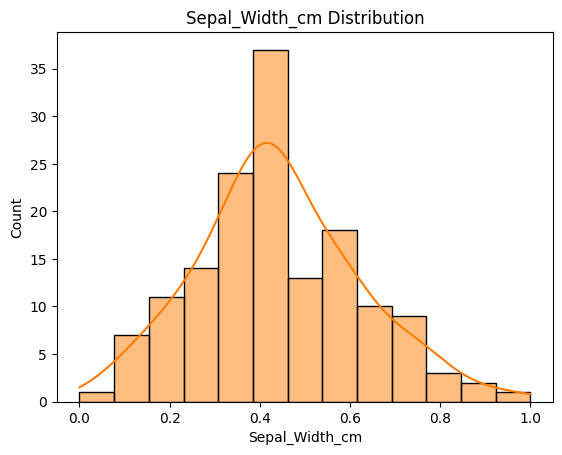

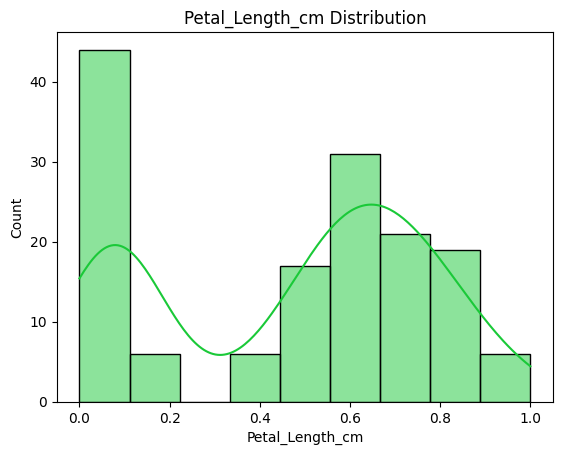

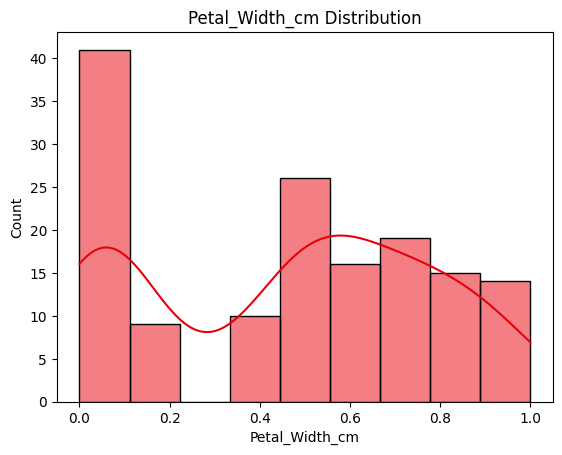

In [146]:
from sklearn.preprocessing import MinMaxScaler

min_max_train_df = train_df.copy()

train_normalized = MinMaxScaler().fit_transform(min_max_train_df)
train_normalized_df = pd.DataFrame(train_normalized, columns=min_max_train_df.columns)

for i, attr in enumerate(train_normalized_df.columns):
    plt.figure()
    sns.histplot(
        data=train_normalized_df,
        x=attr,
        kde=True,
        color=sns.color_palette('bright', len(train_normalized_df.columns))[i]
    )
    plt.title(f'{attr} Distribution')
    plt.xlabel(attr);

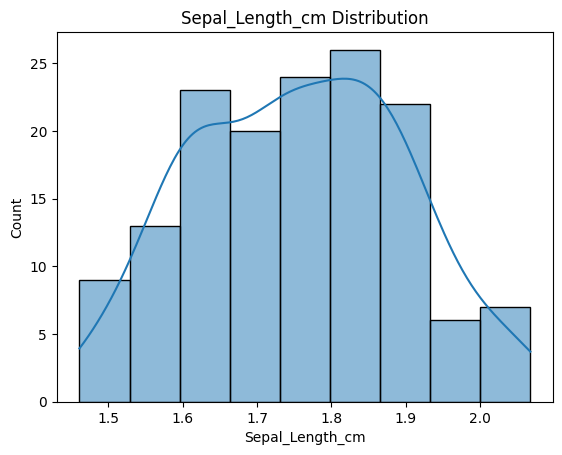

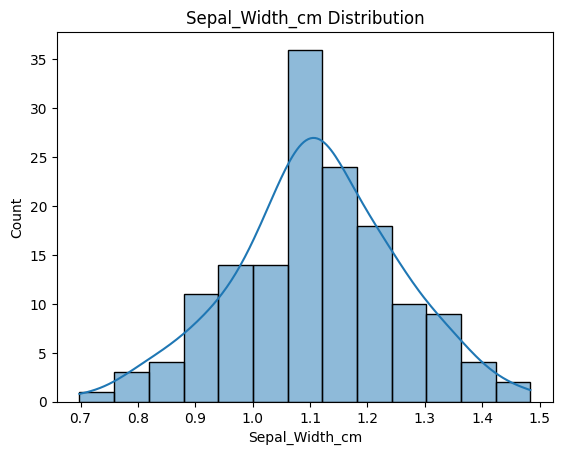

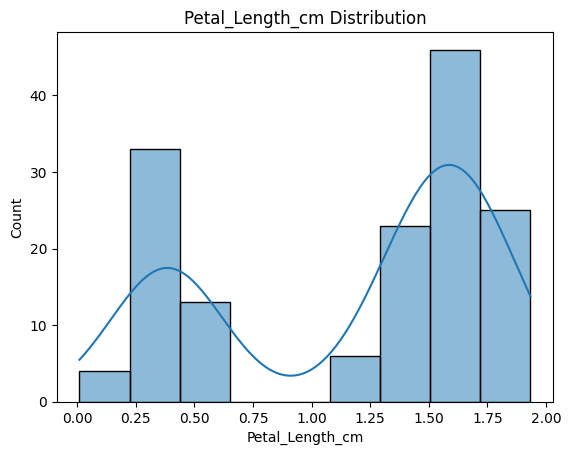

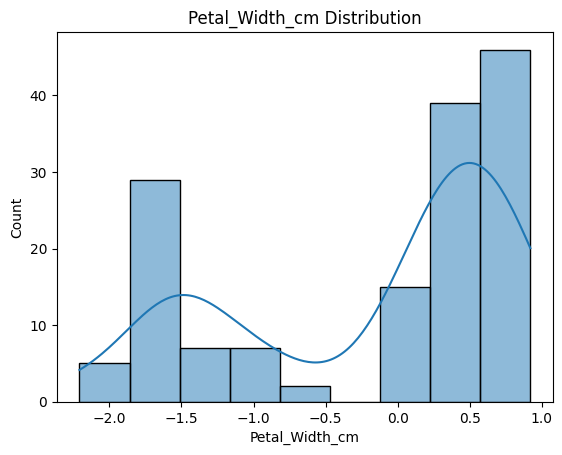

In [147]:
log_train_df = train_df.copy()

# Have to add a small constant value (1e-10) to handle negatives or zero values
log_train_df['Petal_Length_cm'] = np.log(log_train_df['Petal_Length_cm'] + 1e-2)
log_train_df['Petal_Width_cm'] = np.log(log_train_df['Petal_Width_cm'] + 1e-2)
log_train_df['Sepal_Length_cm'] = np.log(log_train_df['Sepal_Length_cm'] + 1e-2)
log_train_df['Sepal_Width_cm'] = np.log(log_train_df['Sepal_Width_cm'] + 1e-2)

log_attributes = log_train_df.columns.tolist()

for attr in log_attributes:
    plt.figure()
    sns.histplot(
        data=log_train_df,
        x=attr,
        kde=True
    )
    plt.title(f'{attr} Distribution')
    plt.xlabel(attr)



Feature engineering: Sepal size and Petal size.
The goal is to explore the data to see if there is anything of interest between the two columns

In [148]:
size_df = train_df
size_df['Petal_Size_cm'] = size_df['Petal_Length_cm'] * size_df['Petal_Width_cm']
size_df['Sepal_Size_cm'] = size_df['Sepal_Length_cm'] * size_df['Sepal_Width_cm']

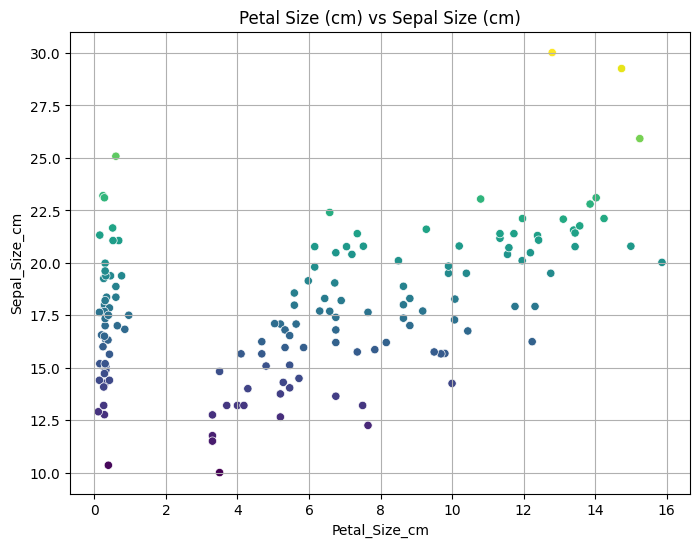

In [149]:
# Plot petal size vs sepal size
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=size_df,
    x='Petal_Size_cm',
    y='Sepal_Size_cm',
    hue='Sepal_Size_cm',
    palette='viridis',
    legend=False,
)
plt.title('Petal Size (cm) vs Sepal Size (cm)')
plt.grid(True);